<a href="https://colab.research.google.com/github/minhong1126/data_analysis/blob/main/Relative_clause(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Relative Clause in Newspapers**



참고자료: 

*Kyungyul Kim, A Cognitive-Functional Account for Relative Clauses in Discourse, 『영어영문학 연구』 제 53권 2호(2011. 6): 15-31*


데이터를 활용한 영어담화 분석(Data-based English Discourse Analysis) 











1. 기존 자료
2. 웹크롤링 (구글 뉴스)
3. 자료 비교
4. Relative Pronoun, Type, Human -> Position 구분
5. 그 외

관계 대명사: 두 문장을 이을 때, 앞에 있는 명사를 대신하며 뒤에 오는 절을 선행사에 연결하는 대명사.


ex)

 (1). I have a pen **which** was my birthday present.
  
  : 주어를 대신하므로 position은 S, 펜의 의미를 제한하고 있어 RRC.

  (2). I have a pen, **which** was my birthday present.

 : 주어를 대신하므로 position은 S, 펜에 추가적인 의미를 더해 NRRC.

  - 앞에 , 이 붙고 뒷 문장이 완전하지 않을 경우 NRRC라고 취급했습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 기존 자료

  (1) RRC(Restrictive Relative Clause, 제한적 용법) NRRC(Non-Restrictive Relative Clause, 계속적 용법)

  (2) Position 별 관계대명사 (역할)
    
    `(자료에 토큰 수만 나와있어 따로 Data Frame을 만들어 가시화했습니다.)`

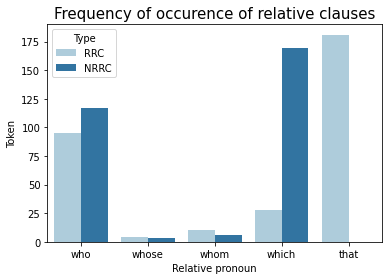

In [2]:
  ##(1). RRC와 NRRC: 관계대명사 별 RRC와 NNRC 빈도수
  ##*Table 1.Frequency of occurence of relative clauses, 19P*
  
sns.set_palette("Paired")
given_meaning = pd.DataFrame({
    'Token': [95, 117, 4, 3, 10, 6, 28, 169, 181, 0],
    'Type': ['RRC', 'NRRC', 'RRC', 'NRRC', 'RRC', 'NRRC', 'RRC', 'NRRC', 'RRC', 'NRRC']},
    index = ['who', 'who', 'whose', 'whose', 'whom', 'whom', 'which', 'which', 'that', 'that']
)

sns.barplot(x = given_meaning.index, y = 'Token', hue = 'Type', data = given_meaning)
plt.title('Frequency of occurence of relative clauses', fontsize = 15)
plt.xlabel('Relative pronoun', fontsize = 10)
plt.show()

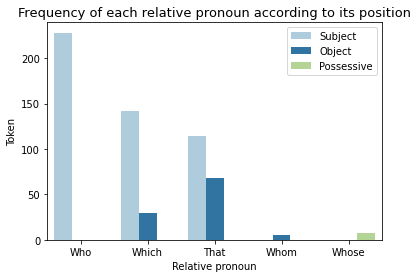

In [3]:
##(2). Position 별 관계 대명사
## *Table 3. Frequency of each relative pronoun according to its position, 20P*

given_pos = {
    'Position': ['Subject', 'Subject', 'Subject', 'Object', 'Object', 'Object', 'Possessive'],
    'Token': [228, 142, 114, 5, 30, 68, 7],
    'Type': ['Who', 'Which', 'That', 'Whom', 'Which', 'That', 'Whose']
}

sns.barplot(x = 'Type', y = 'Token', hue = 'Position', data = given_pos)
plt.title('Frequency of each relative pronoun according to its position', fontsize = 13)
plt.xlabel('Relative pronoun', fontsize = 10)
plt.ylabel('Token', fontsize = 10)
plt.show()

2. 웹크롤링 (구글 뉴스)

  (1) 사이트 가져오기

  (2) 링크와 기사 제목 가져오기




In [4]:
from bs4 import BeautifulSoup as bs
import requests

In [5]:
#(1) 사이트 가져오기
url = requests.get("https://news.google.com/topstories?hl=en-US&gl=US&ceid=US:en")  ##미국 구글 뉴스
soup = bs(url.content, 'html.parser')

In [6]:
# (2) 링크 가져오기
# 자료 분류는 2021.12.07일 기준
# Reference: https://hsj00.github.io/first-news-scraper/

title = soup.select("a href")

titles = [] ##제목
links = []  ##주소

for link in soup.select('h3 a'):  
    href = 'https://news.google.com' + link.get('href')[1:]
    title = link.string
    titles.append(title)
    links.append(href)

for link in soup.select('h4 a'):
    href = 'https://news.google.com' + link.get('href')[1:]
    title = link.string
    titles.append(title)
    links.append(href)

df = {'title': titles, 'link': links}
news_link = pd.DataFrame(df, columns=['title', 'link'])
news_link

,title,link
0,Biden to announce plan for free at-home tests ...,https://news.google.com/articles/CAIiEOpNRxdwP...
1,Democrats try to 'build back' after Manchin ta...,https://news.google.com/articles/CBMiM2h0dHBzO...
2,Jurors Weigh Charges Against Kimberly Potter f...,https://news.google.com/articles/CAIiENeQh0U_6...
3,Omicron Now Dominant U.S. Covid Variant; Accou...,https://news.google.com/articles/CAIiEOVOgNtA7...
4,Abducted Haiti missionaries describe daring es...,https://news.google.com/articles/CBMiMWh0dHBzO...
5,Boston mayor announces 'vaccine requirement fo...,https://news.google.com/articles/CAIiELGh1zBdp...
6,Psaki doesn't deny White House COVID-19 outbreak,https://news.google.com/articles/CAIiEJ411hC5e...
7,"Biden to speak on Omicron COVID variant, detai...",https://news.google.com/articles/CCAiC1RCelBrT...
8,Opinion | Biden's twin crises of the pandemic ...,https://news.google.com/articles/CAIiEPDVW_hNQ...
9,Omicron clobbers Christmas … and Joe Biden,https://news.google.com/articles/CAIiELraxgPH3...


In [ ]:
# (3) 자료 분류 및 업로드
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
newdf = pd.read_excel('/content/drive/MyDrive/관계대명사.xlsx')
newdf

,index,article,sentence,relative pronoun,human,position,type,none,site
0,1,0,We have been preparing a range of economic san...,that,X,S,RRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
1,2,0,The officials said final decisions hadn't been...,whom,O,O,NRRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
2,3,0,The leaders on the call -- which included Fren...,which,X,S,NRRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
3,4,0,He would call for specific agreements that wou...,that,X,S,RRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
4,5,1,But so far there have not been an increase in ...,who,O,S,RRC,NaN,https://news.google.com/articles/CBMifGh0dHBzO...
...,...,...,...,...,...,...,...,...,...
314,315,48,"incredible, and it’s something that I personal...",that,X,O,RRC,NaN,https://news.google.com/articles/CBMibGh0dHBzO...
315,316,48,"As in, the hate video that is the first thing ...",that,X,S,RRC,NaN,https://news.google.com/articles/CBMibGh0dHBzO...
316,317,49,NaN,NaN,NaN,NaN,NaN,X,https://news.google.com/articles/CBMibGh0dHBzO...
317,318,50,NaN,NaN,NaN,NaN,NaN,X,https://news.google.com/articles/CBMiTGh0dHBzO...


In [8]:
newdf = newdf.dropna(subset = ['sentence'], axis = 0) ##NaN 값 제거
newdf= newdf.drop(['index'], axis = 1)  ##불필요한 값 제거
newdf = newdf.drop(['none'], axis = 1) 
newdf

,article,sentence,relative pronoun,human,position,type,site
0,0,We have been preparing a range of economic san...,that,X,S,RRC,https://news.google.com/articles/CBMiS2h0dHBzO...
1,0,The officials said final decisions hadn't been...,whom,O,O,NRRC,https://news.google.com/articles/CBMiS2h0dHBzO...
2,0,The leaders on the call -- which included Fren...,which,X,S,NRRC,https://news.google.com/articles/CBMiS2h0dHBzO...
3,0,He would call for specific agreements that wou...,that,X,S,RRC,https://news.google.com/articles/CBMiS2h0dHBzO...
4,1,But so far there have not been an increase in ...,who,O,S,RRC,https://news.google.com/articles/CBMifGh0dHBzO...
...,...,...,...,...,...,...,...
311,48,I’m gonna try not to get worked up in this vid...,that,X,S,RRC,https://news.google.com/articles/CBMibGh0dHBzO...
312,48,Let me draw this exact same thing for you exce...,that,X,S,RRC,https://news.google.com/articles/CBMibGh0dHBzO...
313,48,but this situation was more serious—the metic...,that,X,S,RRC,https://news.google.com/articles/CBMibGh0dHBzO...
314,48,"incredible, and it’s something that I personal...",that,X,O,RRC,https://news.google.com/articles/CBMibGh0dHBzO...


In [9]:
article = newdf['article'].nunique()  ##기사 개수
rel = newdf['relative pronoun'].value_counts()  ##관계대명사 별 개수
mean = str(newdf['relative pronoun'].value_counts().mean()) ##관계대명사 개수 평균
human = newdf['human'].value_counts() ##human 개수


print("Total article: " + str(article) + "\n")
print("Token:")
print(rel)
print("\n")
print("Relative pronoun Mean: " + mean + "\n")
print("Human: ")
print(human)

Total article: 32

Token:
that     118
who       87
which     86
whose      4
whom       4
Name: relative pronoun, dtype: int64


Relative pronoun Mean: 59.8

Human: 
X    204
O     95
Name: human, dtype: int64


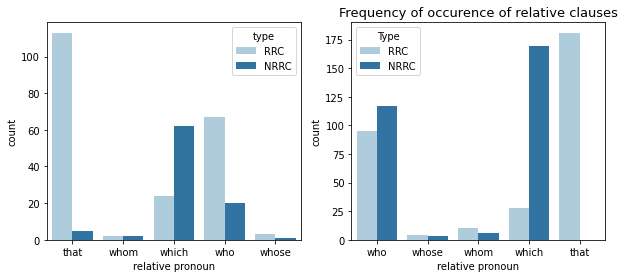

In [10]:
## 3. 자료 비교
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x = 'relative pronoun', hue = 'type', data = newdf, ax= ax[0]) ##새 자료
plt.title('Frequency of occurence of relative clauses', fontsize = 13)
plt.legend(labels=['RRC', 'NRRC'])

sns.barplot(x = given_meaning.index, y = 'Token', hue = 'Type', data = given_meaning, ax = ax[1]) ##기존 자료
plt.xlabel('relative pronoun', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

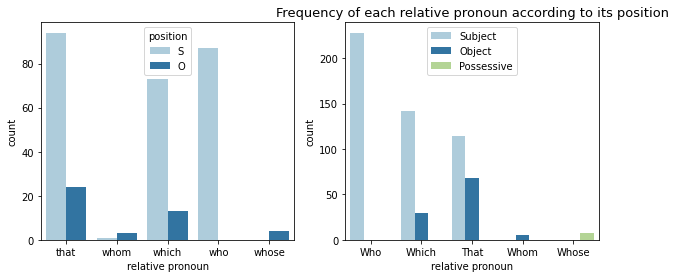

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x = newdf['relative pronoun'], hue = 'position', data = newdf, ax= ax[0]) ##새 자료
plt.title('Frequency of each relative pronoun according to its position', fontsize = 13)

sns.barplot(x = 'Type', y = 'Token', hue = 'Position', data = given_pos, ax = ax[1])  ##기존 자료
plt.xlabel('relative pronoun', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

4. Relative Pronoun, Type, Human에 따라 Positon 구분할 때의 정확도

 (1). LabelEncoder로 인코딩

 (2). BernoulliNB, GaussianNB로 구분

In [12]:
## 4. Relative Pronoun, Type, Human -> Position 구분
from sklearn.preprocessing import LabelEncoder

mdf = pd.DataFrame({'type': {}, 'relative pronoun': {}, 'human': {}, 'position': {}}) ##인코딩
mdf['relative pronoun'] = LabelEncoder().fit_transform(newdf['relative pronoun'])
mdf['human'] = LabelEncoder().fit_transform(newdf.human)
mdf['type'] = LabelEncoder().fit_transform(newdf['type'])
mdf['position'] = LabelEncoder().fit_transform(newdf.position)

mdf

,type,relative pronoun,human,position
0,1,0,1,1
1,0,3,0,0
2,0,1,1,1
3,1,0,1,1
4,1,2,0,1
...,...,...,...,...
294,1,0,1,1
295,1,0,1,1
296,1,0,1,1
297,1,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB

X = mdf.drop(['position'], axis = 1)
y = mdf['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1126)

Bmodel = BernoulliNB()  ##BernoulliNB 사용
Bmodel.fit(X_train,y_train)
predict = Bmodel.predict(X_test)

Gmodel = GaussianNB() ##GaussianNB 사용
Gmodel.fit(X_train,y_train)
predict = Gmodel.predict(X_test)

print("BernoulliNB(train, test): \n")
train_score = Bmodel.score(X_train, y_train)
test_score = Bmodel.score(X_test, y_test)
display(train_score, test_score)

print("\nGaussianNB(train, test): \n")
train_score = Gmodel.score(X_train, y_train)
test_score = Gmodel.score(X_test, y_test)
display(train_score, test_score)

BernoulliNB(train, test): 



0.8577405857740585

0.8333333333333334


GaussianNB(train, test): 



0.8619246861924686

0.8333333333333334

5 - 1. 뉴스 제목에서 가장 많이 나온 단어

  (1). 제목을 문장 - 단어 순으로 나누기

  (2). 중요하지 않은 단어, 특수기호 제외
   - WordNetLemmatizer로 표제어 추출을 하려 했으나 RAM 초과

(3). 몇 번 나온 단어가 가장 많은지 가시화

  (4). 워드 클라우드 제작

In [14]:
## titles에서 가장 많이 나온 단어
## Reference: https://dschloe.github.io/python/nlp/ch01_text_mining/
## 2021. 12. 21. 구글 뉴스 기준
import nltk
import re

from nltk import word_tokenize
from nltk import sent_tokenize

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
## (1) 문장 - 단어로 나누기
word_list = []
for i in titles:
  word  = sent_tokenize(str(i))  ##문장으로 나누기
  for j in word:
    word_list.append(word_tokenize(str(word)))  ##단어로 나누기

print(word_list)

[['[', '``', 'Biden', 'to', 'announce', 'plan', 'for', 'free', 'at-home', 'tests', 'as', 'he', 'assures', 'vaccinated', 'Americans', 'they', 'do', "n't", 'need', 'to', 'cancel', 'holiday', 'plans', "''", ']'], ['[', '``', 'Democrats', 'try', 'to', "'build", 'back', "'", 'after', 'Manchin', 'tanks', '$', '2T', 'bill', "''", ']'], ['[', "'Jurors", 'Weigh', 'Charges', 'Against', 'Kimberly', 'Potter', 'for', 'Killing', 'Daunte', 'Wright', "'", ']'], ['[', "'Omicron", 'Now', 'Dominant', 'U.S.', 'Covid', 'Variant', ';', 'Accounts', 'For', '73', '%', 'Of', 'Cases', 'Less', 'Than', '3', 'Weeks', 'After', 'Discovery', "'", ']'], ['[', "'Abducted", 'Haiti', 'missionaries', 'describe', 'daring', 'escape', "'", ']'], ['[', '``', 'Boston', 'mayor', 'announces', "'vaccine", 'requirement', 'for', 'select', 'indoor', 'spaces', "'", "''", ']'], ['[', '``', 'Psaki', 'does', "n't", 'deny', 'White', 'House', 'COVID-19', 'outbreak', "''", ']'], ['[', '``', 'Biden', 'to', 'speak', 'on', 'Omicron', 'COVID', 

In [17]:
## (2) 중요하지 않은 단어(the, a 등) 나 특수기호 빼기
stopwords = nltk.corpus.stopwords.words("english")
filtered_word = []

for i in word_list:
  for word in i:
    word = word.lower()
    if word not in stopwords and len(word) > 3:
      filtered_word.append(word)

filtered_word = re.sub(r'[^\w]', ' ', str(filtered_word))
filtered_word = (',').join(filtered_word.split())
filtered_word = filtered_word.split(',')

print(filtered_word)

['biden', 'announce', 'plan', 'free', 'at', 'home', 'tests', 'assures', 'vaccinated', 'americans', 'need', 'cancel', 'holiday', 'plans', 'democrats', 'build', 'back', 'manchin', 'tanks', 'bill', 'jurors', 'weigh', 'charges', 'kimberly', 'potter', 'killing', 'daunte', 'wright', 'omicron', 'dominant', 'u', 's', 'covid', 'variant', 'accounts', 'cases', 'less', 'weeks', 'discovery', 'abducted', 'haiti', 'missionaries', 'describe', 'daring', 'escape', 'boston', 'mayor', 'announces', 'vaccine', 'requirement', 'select', 'indoor', 'spaces', 'psaki', 'deny', 'white', 'house', 'covid', '19', 'outbreak', 'biden', 'speak', 'omicron', 'covid', 'variant', 'detail', 'administration', 'response', 'latest', 'surge', 'opinion', 'biden', 'twin', 'crises', 'pandemic', 'demand', 'action', 'anger', 'omicron', 'clobbers', 'christmas', 'biden', 'manchin', 'blasts', 'staff', 'leaking', 'absolutely', 'inexcusable', 'things', 'rejecting', 'editorial', 'dems', 'love', 'rebel', 'unless', 'manchin', 'finley', 'manc

In [18]:
from collections import Counter

count = list(Counter(filtered_word).most_common())  ##단어 별로 몇 번 나왔는지 나열
common = list(Counter(filtered_word).most_common(30)) ##가장 많이 나온 단어 30개
count

[('omicron', 12),
 ('covid', 10),
 ('variant', 9),
 ('biden', 7),
 ('manchin', 6),
 ('the', 6),
 ('potter', 5),
 ('19', 5),
 ('u', 4),
 ('s', 4),
 ('cases', 4),
 ('haiti', 4),
 ('boston', 4),
 ('indoor', 4),
 ('free', 3),
 ('build', 3),
 ('back', 3),
 ('accounts', 3),
 ('missionaries', 3),
 ('daring', 3),
 ('escape', 3),
 ('vaccine', 3),
 ('better', 3),
 ('jury', 3),
 ('trial', 3),
 ('live', 3),
 ('proof', 3),
 ('bill', 2),
 ('kimberly', 2),
 ('killing', 2),
 ('daunte', 2),
 ('wright', 2),
 ('dominant', 2),
 ('mayor', 2),
 ('announces', 2),
 ('requirement', 2),
 ('response', 2),
 ('editorial', 2),
 ('people', 2),
 ('dashes', 2),
 ('dreams', 2),
 ('could', 2),
 ('updates', 2),
 ('across', 2),
 ('nation', 2),
 ('made', 2),
 ('hostage', 2),
 ('venues', 2),
 ('rise', 2),
 ('vaccination', 2),
 ('risk', 2),
 ('public', 2),
 ('health', 2),
 ('fauci', 2),
 ('viral', 2),
 ('retailers', 2),
 ('thefts', 2),
 ('crisis', 2),
 ('level', 2),
 ('numbers', 2),
 ('otherwise', 2),
 ('chris', 2),
 ('noth'

Text(0, 0.5, 'Total')

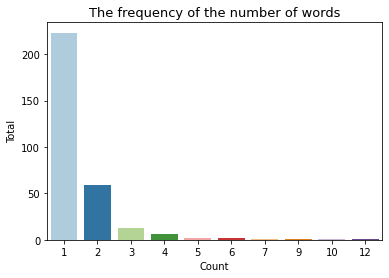

In [20]:
## (3) 몇 번 나온 단어가 가장 많은지 가시화
count_num = []
for i in count:
  count_num.append(i[1])  ## 나온 숫자만 가져오기

count_num = list(Counter(count_num).most_common())  ## 몇 번이 가장 많은지 나열

Count = []
Total = []
for i in count_num:
  Count.append(i[0])
  Total.append(i[1])

sns.barplot(x = Count, y = Total) ## 몇 번 나온 단어들이 가장 많은지
plt.title('The frequency of the number of words', fontsize = 13)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Total', fontsize = 10)

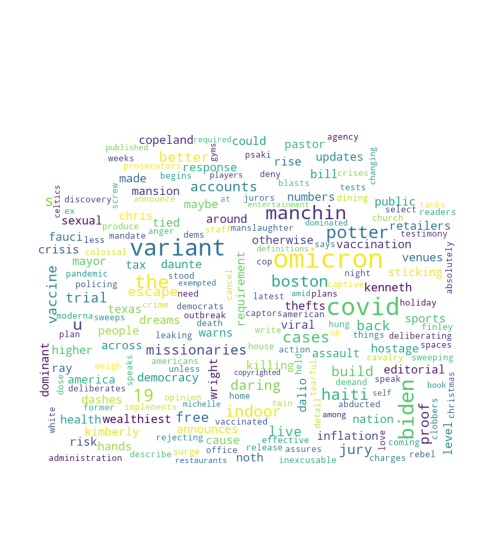

In [26]:
## (4). 단어 구름 만들기
## Reference: https://ichi.pro/ko/python-eulo-aleumdaun-dan-eo-guleum-eul-mandeuneun-bangbeob-228490197864980

from wordcloud import WordCloud ##워드 클라우드
from PIL import Image

mask = np.array(Image.open('/content/drive/MyDrive/KakaoTalk_20211221_220130593.jpg'))

cloud = WordCloud(background_color = "white", max_font_size = 50, mask = mask)
cloud = cloud.generate_from_frequencies(dict(count))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

5 - 2. 다른 자료

  (1). 연도, 개월 별 뉴스 개수

  (2). 뉴스 제목에서의 관계대명사 개수

In [27]:
## 다른 자료 (headline_text, 출저: https://www.kaggle.com/therohk/million-headlines)
head = pd.read_csv('/content/drive/MyDrive/abcnews-date-text.csv', parse_dates=['publish_date'])
head

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [28]:
## 연도별 기사 개수
date = pd.DataFrame(head['publish_date'].value_counts())
date = date.rename_axis('Date')
date = date.rename(columns={'publish_date':'count'})
date = date.sort_values('Date')

date  ##날짜 별로 출력

,count
Date,
2003-02-19,198
2003-02-20,250
2003-02-21,250
2003-02-22,126
2003-02-23,136
...,...
2020-12-27,50
2020-12-28,64
2020-12-29,84


Text(0, 0.5, 'count')

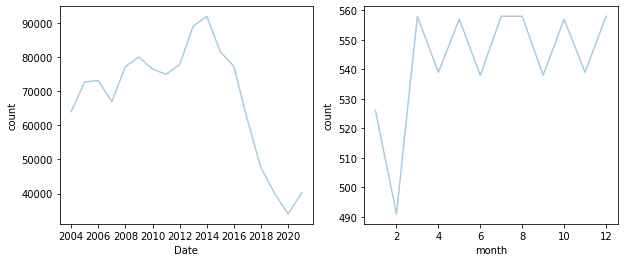

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

year = date.resample("1Y").sum()  ##1년 단위로 resample
sns.lineplot(x = year.index, y = year['count'], ax = ax[0]) ##년도 별 개수

month = pd.DataFrame(date.index.month.value_counts())
month = month.rename_axis('month').reset_index()
month = month.sort_values('month')
month = month.set_index('month')

sns.lineplot(x = month.index, y = month['Date'], ax = ax[1])  ##월 별 개수
plt.ylabel('count', fontsize = 10)

전체 중의 비율: 0.003803441037693536


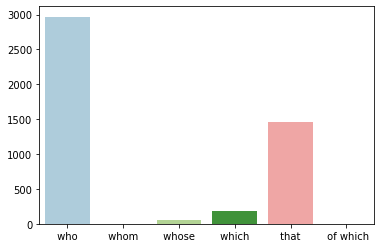

In [30]:
rel = [' who ', ' whom ', ' whose ', ' which ', ' that ', ' of which']
num = []
for i in rel:
  num.append(len(head[head['headline_text'].str.contains(i)]))  ##관계 대명사를 포함하는 기사 개수 세기

sns.barplot(x = rel, y = num)

print("전체 중의 비율: " + str(sum(num) / len(head)))